In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def intensity(s, T, alpha, beta, mu):
    intensity_value = mu
    for tau in T:
        intensity_value += alpha * np.exp(-beta * (s - tau))
    return intensity_value

In [ ]:
def intensity

In [50]:
def sim_Hawkes(mu, alpha, beta, T):
    t = []
    s = 0
    n = 0
    times = [0]
    events_count = [0]
    intensity_hawkes =[mu]
    DLaccept=[]
    DLrefus=[]
    timesrefus=[]

    while s < T:
        lambda_bar = intensity(s, t, alpha, beta, mu)
        u = np.random.uniform(0, 1)
        w = -np.log(u) / lambda_bar
        s += w
        D = np.random.uniform(0, 1)
        lambda_s = intensity(s, t, alpha, beta, mu)
        if D * lambda_bar <= lambda_s:
            DLaccept.append(D*lambda_bar)
            n += 1
            t.append(s)
            times.append(s)
            events_count.append(n)
            intensity_hawkes.append(lambda_s)
        else:
            DLrefus.append(D*lambda_bar)
            timesrefus.append(s)



    if t[-1] <= T:
        return times, events_count, intensity_hawkes,DLaccept,DLrefus,timesrefus
    else:
        return times[:-1], events_count[:-1], intensity_hawkes[:-1], DLaccept[:-1], DLrefus[:-1], timesrefus[:-1]

[0, 0.7881950037662335, 0.9646491666476323, 1.0661561390064134, 1.2031807392220302, 1.5131904829855738, 3.016755551440988, 3.1116330049472163, 3.4192613916944756, 3.583546469357507, 3.679274806326759, 3.6929071005114467, 3.724157225335215, 4.312387150584142, 4.5668785655418445, 4.5789667058718075, 4.6140308263241385, 4.825384686602428, 4.945565925985874, 4.953738514895946, 5.400410922823822, 5.426143605678475, 5.521446004739165, 5.741703753472965, 5.8222049566460745, 6.065621618677699, 6.169144923248675, 6.37082659959407, 6.494535681955864, 6.577708561280088, 6.642871723973678, 6.901709016347744, 6.933473600982707, 6.988971843006488]
[1.2, 1.2, 1.7210084835942108, 2.233574449732912, 2.6639684249747497, 2.810625728147015, 1.8639314024527316, 2.3715469573201915, 2.5850696714499346, 2.940593157691733, 3.3680360547634463, 3.9380123238243634, 4.455596180797987, 3.608349615739769, 3.6541942410889914, 4.224800971280344, 4.724533496060087, 4.682915858425666, 4.908644377095287, 5.48056604278627

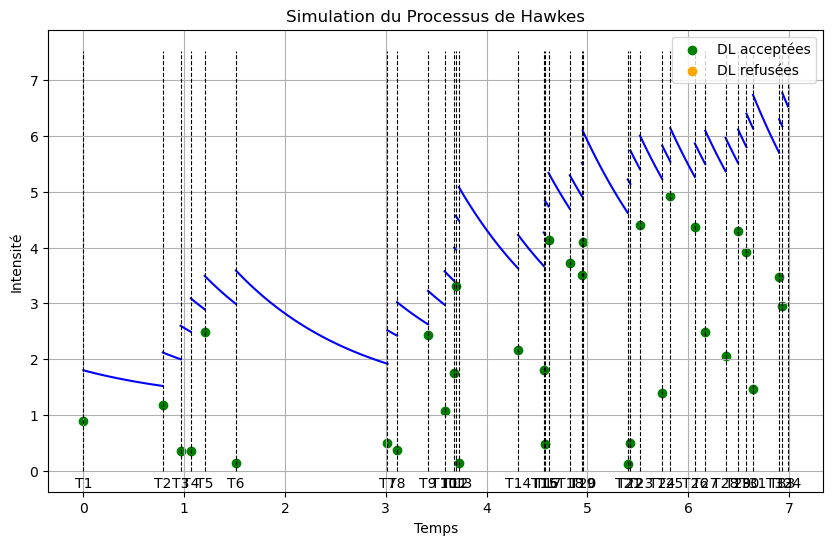

In [100]:
# paramètres
mu = 1.2
alpha = 0.6
beta = 0.8
T = 7

# Simulation du processus de Hawkes
times, events_count, intensity_hawkes, DLaccept, DLrefus, timesrefus = sim_Hawkes(mu, alpha, beta, T)

# Tracé de l'intensité conditionnelle λ(t)
plt.figure(figsize=(10, 6))

# Tracé de la fonction particulière entre les points
for i in range(len(times) - 1):
    x_values = np.linspace(times[i], times[i + 1], 100)  # 100 points entre deux temps
    y_values = intensity(x_values, times[:i+1], alpha, beta, mu)
    plt.plot(x_values, y_values, color='blue', linestyle='-')


# on trace en pointillé rouge le M
#for i in range(len(intensity_hawkes)-1):
#    plt.hlines(y=intensity_hawkes[i], xmin=times[i], xmax=times[i+1], color='red', linestyle='--')

# pour tracer les droites verticales au moment des sauts
for i, t in enumerate(times):
    plt.vlines(x=t, ymin=0, ymax=max(intensity_hawkes)+1, color='black', linestyle='--',linewidth=0.8)

# on nomme les sauts T1, T2 ...
for i, t in enumerate(times):
    plt.text(t, -0.3, f"T{i+1}", ha='center', color='black')

timesall=[]
for element in timesrefus:
    timesall.append(element)
for element in times:
    timesall.append(element)

# Tracé en pointillé rouge de l'intensité du processus de Hawkes à partir de la deuxième valeur
#for i in range(len(timesall) - 1):
#    t = timesall[i]
#    plt.hlines(y=alpha*np.exp(-beta, xmin=t, xmax=timesall[i + 1], color='red', linestyle='--')




np.sort(timesall)
print(timesall)

times = times[:-1]
plt.scatter(times, DLaccept, color='green', label='DL acceptées')

# Tracé des valeurs de DLrefus aux temps timesrefus
plt.scatter(timesrefus, DLrefus, color='orange', label='DL refusées')

print(intensity_hawkes)
plt.xlabel('Temps')
plt.ylabel('Intensité')
plt.title('Simulation du Processus de Hawkes')
plt.legend()
plt.grid(True)
plt.show()